In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Joint3DLib import *
from scipy.optimize import curve_fit
from IPython.display import display, Math

%config InlineBackend.figure_formats = ['svg']

In [2]:
t_unit = "s"
v_unit = "mVpp"
T_unit = "K"
f_unit = "Hz"

In [3]:
# Define the relevant directories
path0 = "C:/Users/Admin/Desktop/3DJoint_DataAnalysis/"
erosion = "data_erosion/"
printed = "data_printed/"

# Define a pattern to identify data files
pattern = '^[0-3][0-9]_[0-1][0-9].xlsx'

### Comparison of Electroerosion and 3D printed (CuCrZr)

In [5]:
# Do the analysis on Electroeroded Joint

path = path0+erosion

# this searches for files with the right pattern
files = []
for file in os.listdir(path):
    if re.match(pattern, file):
        files.append(file)


# Here we store the variables
Q_ero = []
errQ_ero = []
T_ero = []
errT_ero = []
chisq_ero = []
V0_ero = []



# Loop over all data
for file in files:
    day = pd.ExcelFile(path+file)
    sheets = day.sheet_names
    for sheet in sheets:
        data = pd.read_excel(path+file, sheet_name = sheet)
        q, errq, t, errt, chi = fitSheet(path+file, sheet, initial = [300, 50])
        Q_ero.append(q)
        errQ_ero.append(errq)
        T_ero.append(t)
        errT_ero.append(errt)
        chisq_ero.append(chi)
        V0_ero.append(data['Voltage'][0])            


            
# Do the analysis on 3D printed Joint

path = path0+printed
files = []
for file in os.listdir(path):
    if re.match(pattern, file):
        files.append(file)

        
Q_print = []
errQ_print = []
T_print = []
errT_print = []
chisq_print = []
V0_print = []


for file in files:
    day = pd.ExcelFile(path+file)
    sheets = day.sheet_names
    for sheet in sheets:
        data = pd.read_excel(path+file, sheet_name = sheet)
        q, errq, t, errt, chi = fitSheet(path+file, sheet, initial = [300, 50])
        Q_print.append(q)
        errQ_print.append(errq)
        T_print.append(t)
        errT_print.append(errt)
        chisq_print.append(chi)
        V0_print.append(data['Voltage'][0]) 

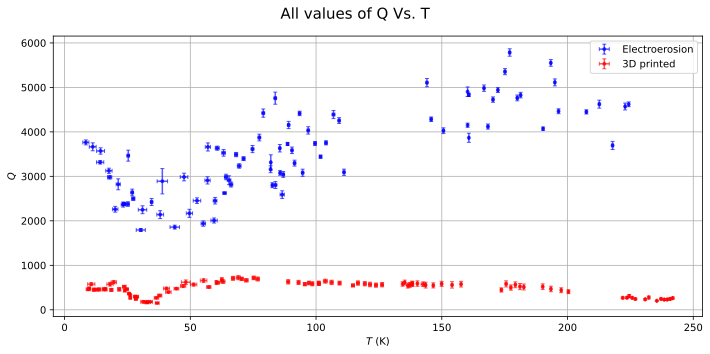

In [7]:
# # Figure of all data # #
fig = plt.figure(figsize=(10,5), dpi=100);
fig.suptitle(r"All values of Q Vs. T", size = 15)
plt.grid()
plt.xlabel(r"$T$ ({0})".format(T_unit), size = 10)
plt.ylabel(r"$Q$", size = 10)
plt.errorbar(T_ero, Q_ero, yerr=errQ_ero,xerr=errT_ero, fmt=".b", capsize=2,alpha = 0.65,label="Electroerosion")
plt.errorbar(T_print, Q_print, yerr=errQ_print,xerr=errT_print, fmt=".r", capsize=2,alpha = 0.65,label="3D printed")
plt.legend()
# plt.ylim(0,1000)
plt.tight_layout()
plt.show()

The data from the Electroeroded joint have more dispersion. Maybe this is because of the dispersion in the initial voltages of the coil. So we made an histogram of it.

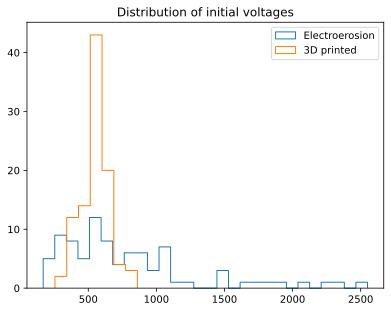

In [6]:
plt.title('Distribution of initial voltages')
plt.hist(V0_ero, bins = 28, label = 'Electroerosion', histtype = 'step')
plt.hist(V0_print, bins = 7, label = '3D printed', histtype = 'step')
plt.legend()
plt.show()

### Effect of different initial voltages

In [8]:
# Do the analysis on Electroeroded Joint

path = path0+erosion

# this searches for files with the right name
files = []
for file in os.listdir(path):
    if re.match(pattern, file):
        files.append(file)

        
Q = [[],[],[]]
errQ = [[],[],[]]
T = []
errT = []
chisq = [[],[],[]]

cuts = [900, 700, 600]

for file in files:
    day = pd.ExcelFile(path+file)
    sheets = day.sheet_names
    for sheet in sheets:
        for i in range(len(cuts)):
            q, errq, t, errt, chi = fitSheet(path+file, sheet, initial = [300, 50], cut = cuts[i])
            Q[i].append(q)
            errQ[i].append(errq)
            chisq[i].append(chi)  
        T.append(t)
        errT.append(errt)

We try to see if the non uniformity of range of voltages measure by measure affects the Q. We try therefore to cut the data in order to start always from the same voltage. Three different cuts have been applied starting from 900,700 and 600 mVpp.

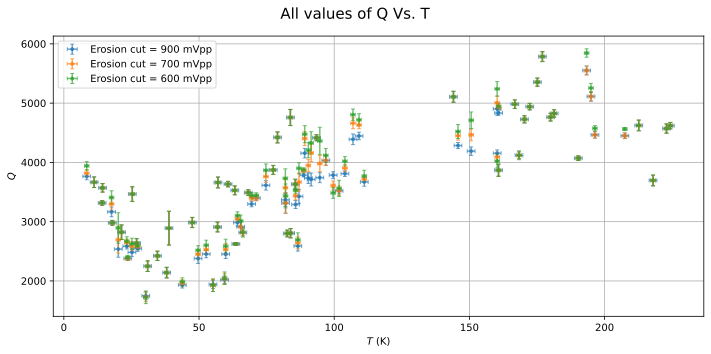

In [9]:
fig = plt.figure(figsize=(10,5), dpi=100);
fig.suptitle(r"All values of Q Vs. T", size = 15)
plt.grid()
plt.xlabel(r"$T$ ({0})".format(T_unit), size = 10)
plt.ylabel(r"$Q$", size = 10)
for i in range(len(cuts)):
    plt.errorbar(T, Q[i], yerr=errQ[i],xerr=errT[i], fmt=".", capsize=2,alpha = 0.65,label=f"Erosion cut = {cuts[i]} {v_unit}")
plt.legend()
plt.tight_layout()
plt.show()

### Effect of the strength of the initial push 

In [10]:
# Do the analysis on Electroeroded Joint

path = path0+erosion

# this searches for files with the right name
files = []
for file in os.listdir(path):
    if re.match(pattern, file):
        files.append(file)

        
Q = [[],[]]
errQ = [[],[]]
T = [[],[]]
errT = [[],[]]
chisq = [[],[]]

threshold = 600

for file in files:
    day = pd.ExcelFile(path+file)
    sheets = day.sheet_names
    for sheet in sheets:
        data = pd.read_excel(path+file, sheet_name = sheet)
        q, errq, t, errt, chi = fitSheet(path+file, sheet, initial = [300, 50])
        if data['Voltage'][0]>=threshold:
            j = 1
        else:
            j = 0
        Q[j].append(q)
        errQ[j].append(errq)
        chisq[j].append(chi)  
        T[j].append(t)
        errT[j].append(errt)

In this case we want to see if the only fact that we excite the joint differently produces disperion in the data. Therefore we analyze separately the measures with initial voltage > threshold and voltage < threshold.

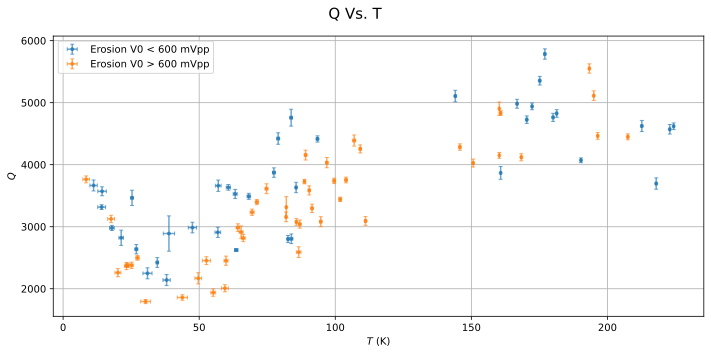

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(10,5), dpi=100);
fig.suptitle(r"Q Vs. T", size = 15)
plt.grid()
plt.xlabel(r"$T$ ({0})".format(T_unit), size = 10)
plt.ylabel(r"$Q$", size = 10)

plt.errorbar(T[0], Q[0], yerr=errQ[0],xerr=errT[0], fmt=".", capsize=2,
             alpha = 0.65,label=f"Erosion V0 < {threshold} {v_unit}")
plt.errorbar(T[1], Q[1], yerr=errQ[1],xerr=errT[1], fmt=".", capsize=2,
             alpha = 0.65,label=f"Erosion V0 > {threshold} {v_unit}")

plt.legend()
plt.tight_layout()
plt.show()